# 1. Introduction

Welcome to the session on ‘Multiple Linear Regression in Python’. In the last session, you learnt about the various theoretical aspects of multiple linear regression. Now, let’s move on to building a multiple linear regression model in Python.

1. You will learn the generic steps that are required to build a multiple linear regression model.
2. You will build this model for a **housing dataset and predict the price of a house** using the various potential predictor variables provided.
3. You will first read and visualise your dataset and then prepare your data for building a linear model.
4. This will include dealing with categorical variables, adding dummy variables, and scaling. You will then start building the model with a bottom-up approach, i.e., you will start with one variable and keep on adding more.
5. Once all the variables have been added, you will perform a manual feature elimination and move on to the residual analysis and predictions, as usual.
6. In the end, you will solve the same problem using RFE.

#2. Reading and Understanding the Data

Linear regression is used in various fields such as real estate, telecom, e-commerce, etc. to build predictive models. Let's look at one such example from the real-estate industry. Here, you will predict the price of a house on the basis of some predictor variables, such as floor area, number of bedrooms, parking space, etc.



**Problem Statement:**

Consider that a real estate company has the data of real-estate prices in Delhi. The company wants to optimise the selling price of the properties, based on important factors such as area, bedrooms, parking, etc.



Essentially, the company wants:

- To identify the variables affecting house prices, e.g., area, number of rooms, bathrooms, etc.
- To create a linear model that quantitatively relates house prices with variables, such as the number of rooms, area, number of bathrooms, etc.
- To know the accuracy of the model, i.e. how well do these variables predict the house prices


In [42]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [43]:
housing_prices_path ='/content/drive/MyDrive/UG-ML-AI/2.Machine_Learning-1/2.1_Linear_Regression/2. Housing.csv'


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')

In [45]:
df_housing = pd.read_csv(housing_prices_path)
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df_housing.shape

(545, 13)

In [6]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


No missing values

In [7]:
df_housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Now that we’ve read and inspected the data, let’s move on to visualising it. This will help in interpreting the data well and identifying the variables that can turn out to be useful in building the model.

General visualizations for Linear Regression models whether linear model makes sense or not is by plotting 2 ways

1. By knowing the linear relationship of predictors with target.(by using pair plots or scatter plot)
2. By seeing the multicollinearity(any of the variable have high correlation with group of variables).

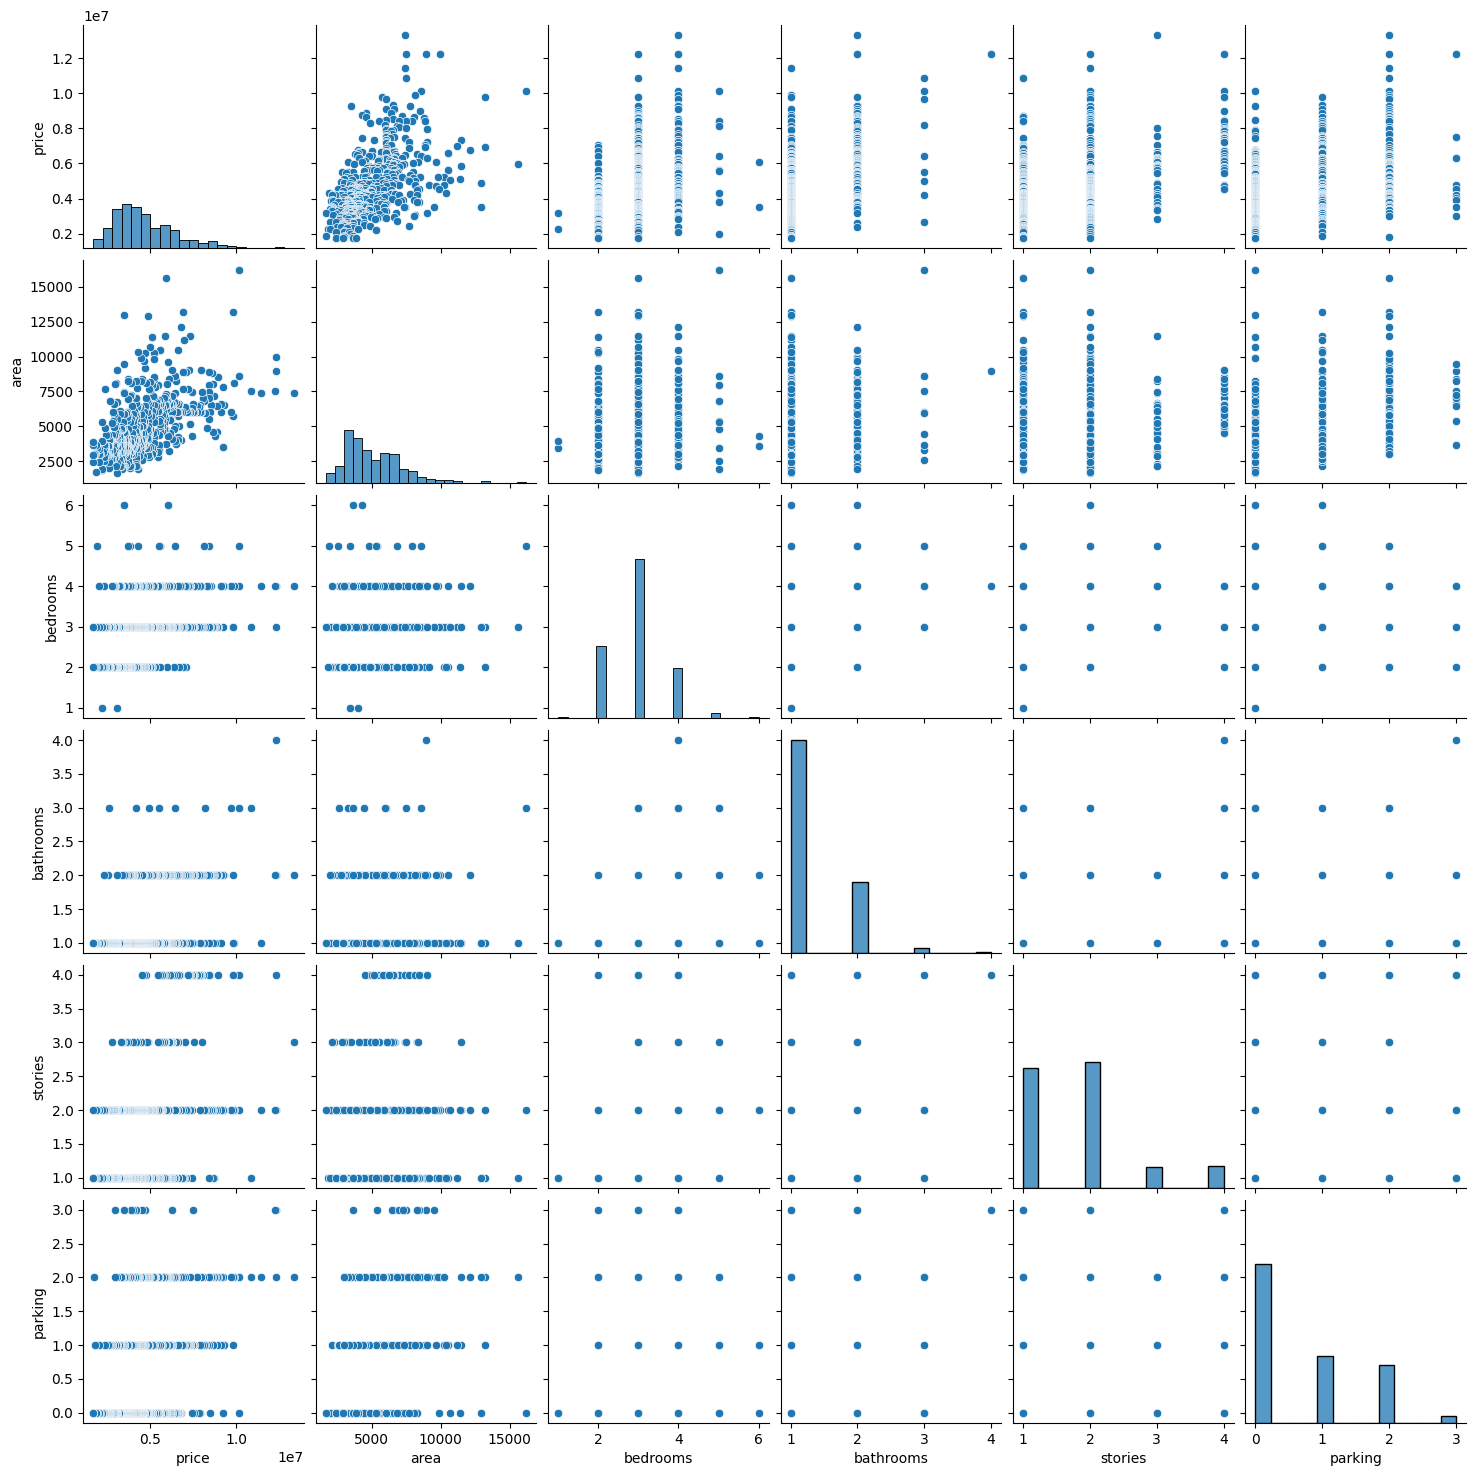

In [8]:
# visualizing
sns.pairplot(df_housing)
plt.show()

**Observations:**

1. There is some sort of positive trend b/w price and the area.
2. Even there is some similar positive correlation b/w # bedrooms and price.

Whether at all Linear regression model is a good choice or not ?

Yes , since atleast majority of the variables are showing some positive correlation with price.

That was all about visualising the numerical variables. You might have noticed that there are a few categorical variables present in the dataset as well. Let’s visualise them too, using **boxplots**.

Now, lets visualise categorical variables

(array([0, 1, 2]),
 [Text(0, 0, 'furnished'),
  Text(1, 0, 'semi-furnished'),
  Text(2, 0, 'unfurnished')])

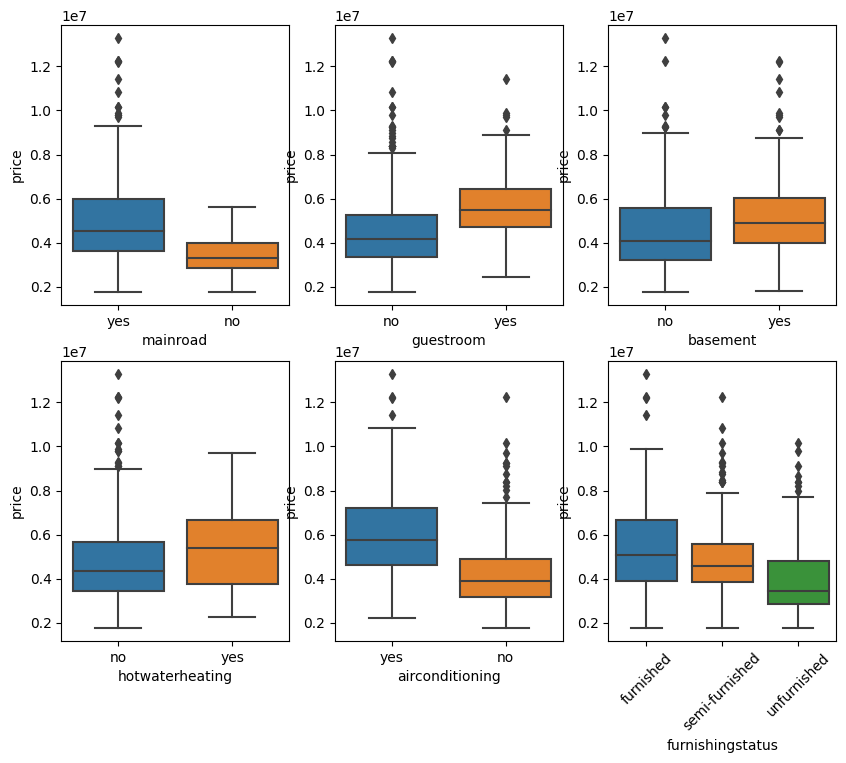

In [9]:
# visualise the categorical variables

plt.figure(figsize=(10,8))

plt.subplot(2,3,1) # 2 * 3 plots
sns.boxplot(x='mainroad',y='price',data=df_housing)

plt.subplot(2,3,2) # 2 * 3 plots
sns.boxplot(x='guestroom',y='price',data=df_housing)

plt.subplot(2,3,3) # 2 * 3 plots
sns.boxplot(x='basement',y='price',data=df_housing)

plt.subplot(2,3,4) # 2 * 3 plots
sns.boxplot(x='hotwaterheating',y='price',data=df_housing)

plt.subplot(2,3,5) # 2 * 3 plots
sns.boxplot(x='airconditioning',y='price',data=df_housing)

plt.subplot(2,3,6) # 2 * 3 plots
sns.boxplot(x='furnishingstatus',y='price',data=df_housing)

plt.xticks(rotation=45)

**Observations**

1. Median is higher for property located on the mainroad
2. From the plot we can observe that the price distribution of the houses which are around the mainroad tend to be higher , than the ones that are not near to mainroad.


Similarly for every other facility such as airconditioning , furnish , etc., we tend to see the price distribution tend to be higher where it is yes.

**QUIZ**

1) You obtained the following box plot from the notebook:

What can you say, from the figure above, about the median of the category ‘semi-furnished with airconditioning’?

CHOICES:

● It lies between 0.8 and 1.0

● It lies between 0.6 and 0.8

● **It lies between 0.4 and 0.6**

● It lies between 0.2 and 0.4


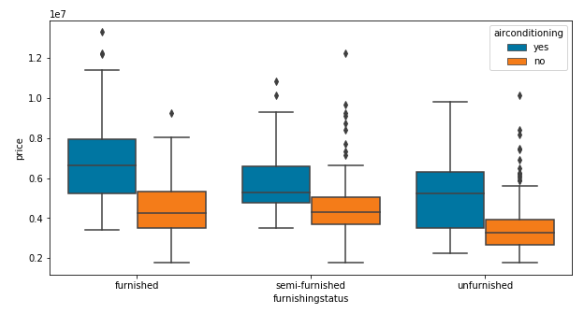

The category 'semi-furnished with airconditioning' is the third box plot from the left. Recall what the different lines mean in a boxplot. The upper and lower tails represent the maximum and minimum values. The lower and upper boundary of the box represent the 1st and 3rd quartile respectively, and the line inside the box represents the median. As you can see, for the category - 'semi-furnished with airconditioning', the median lies between 0.4 and 0.6

In the next segment, let's do the data preparation, which is an important step before model building.

# 3. Data Preparation

Now that you have a sense of what variables are important and that the data is well behaved with very few outliers, let’s move on to preparing the data for multiple linear regression. This involves handling the categorical variables first and then performing dummy encoding.

Usual steps for data preparation

1. convert binary categorical variables to 1s and 0s and other categorical variables to dummy variables using some encoding techniques
2. Splitting into training and testing sets
3. Rescaling


In [10]:
df_housing.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [46]:
# yes /no variables
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

df_housing[varlist]= df_housing[varlist].apply(lambda x: x.map({'yes':1,'no':0}))
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


#### Dummy variables

In [48]:
# create dummy variables for furnishingstatus
status = pd.get_dummies(df_housing['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


100 - furnished ,
010 - semi ,
001 - unfurnished


Now , we don't need 3 columns , you can drop the furnished column , as the type of furnishing can be identified with just the last two columns where -

- 00 will correspond to furnished
- 01 will correspond to unfurnished
- 10 will correspond to semi-furnished

**Special case Description**:

You're given two lists, the first of which contains the name of some people and the second contains their corresponding 'response'. These lists have been converted to a dataframe.
Now, the values that the 'response' variable can take are ‘Yes’, ‘No’, and ‘Maybe’. Write a code to map these variables to the values ‘1.0’, ‘0.0’, and ‘0.5’.

Note: It also might happen the the first letter of the three responses are not in uppercase, i.e. you might also have the values 'yes', 'no', and 'maybe' in the dataframe. So make sure you handle that in your code.

Example:
Input 1:

['Reetesh', 'Shruti', 'Kaustubh', 'Vikas', 'Mahima', 'Akshay']

['No', 'Maybe', 'yes', 'Yes', 'maybe', 'Yes']

To do that , we can do as follows

Remove redundant dummy variables

In [49]:
# create dummy variables for furnishingstatus by dropping redundant dummy var
status = pd.get_dummies(df_housing['furnishingstatus'], drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [50]:
# concat the dummy df with the original one

df_housing = pd.concat([df_housing,status], axis=1)
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


Drop the existing furnishingstatus

In [51]:
df_housing = df_housing.drop('furnishingstatus',axis=1)
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


Now that the data has been prepared, let's do the scaling in the next segment.

# 4. Initial Steps

Before model building, you first need to perform the **test-train split and scale the features**.



Scaling of variables is an important step because, as you may have noticed, the variable ‘area’ is on a different scale with respect to all other numerical variables, which take very small values. Also, the categorical variables that you encoded earlier take either 0 or 1 as their values. Hence, it is important to have everything on the same scale for the model to be easily interpretable.

#### Splitting into train and test

In [52]:
df_train , df_test = train_test_split(df_housing , train_size=0.7 , random_state=100)
print('Train shape : ',df_train.shape)
print('Test shape : ',df_test.shape)

Train shape :  (381, 14)
Test shape :  (164, 14)


#### Rescaling the features

As you saw in the demonstration **for Simple Linear Regression , scaling doesn't impact the model** . Here we can see that except for "area", all the columns have small integer values. So it is **extremely important to rescale the variables so that they have a comparable scale**. If we don't have comparable scales , then some of the coefficients obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So , it is advised to use **standardisation** or **normalization** so that the units of the coefficients obtained are all on the same scale.

Ex: without scaling the model may derive the coeff as follows

1. coeff(area) = 0.001 (very small since the area values are not scaled and the values are very big)
2. coeff(bedrooms) = 560 (very big , due to the

There are two common ways of rescaling
1. Min-Max Scaling (Normalization) : Between 0 and 1
2. Standardisation (mean=0 , sigma=1)


**Advantages of Rescaling**

1. Optimization happens faster
2. Better interpretability
3. Resolves too large or too small coefficients issue.


**Normalization**:

- (x - xmin) / (xmax-xmin)

**Standardization**:

- (x-mean) / sigma


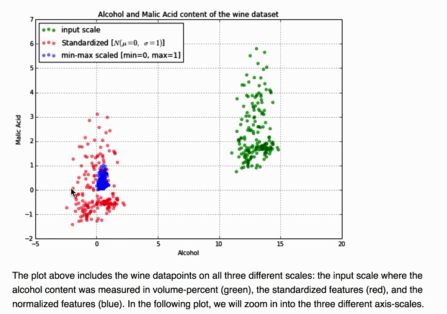

**Additional Resource on Scaling**

https://sebastianraschka.com/Articles/2014_about_feature_scaling.html

Generally Min-Max scaling takes care of the outliers.

Standardisation gets effected with outliers since , we take mean , sigma into consideration.

Hence Min-max is widely used. But standardisation has its own advantages.

You have seen the two popular rescaling methods- Min-Max scaling and Standardisation (mean=0 and sigma=1). The advantage of Standardisation over the other is that it doesn't compress the data between a particular range as in Min-Max scaling. This is useful, especially if there are extreme data point (outlier). Now, let's rescale and fit the data.



Note : There is no effect of Min-Max scaling on binary variable (consist of 0 and 1).

In [54]:
# min max scaling
# 1. instantiate an object
scaler = MinMaxScaler()

# create a list of numeric vars
num_vars = ['area','bedrooms','bathrooms','stories','parking','price']

# 2. fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()





,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In scikit learn there are certain common paradigms related to in general

1. fit() : Learns by going through the features
2. transform() : Computes based on the learning

3. fit_transform() : both does fit and tranforms i.e., learns and computes

Now that you have prepared the data and are done with the test-train split, let’s prepare a heat map and take a look at the correlations between the variables.

Let's understand how many numbers of variables we might need for our model by understanding the correlation of the variables with the target variable.

There are multiple ways to arrive at the model

1. By taking all variables for training and remove the insignificant ones.
2. Start with one and keep on adding if the model improves.


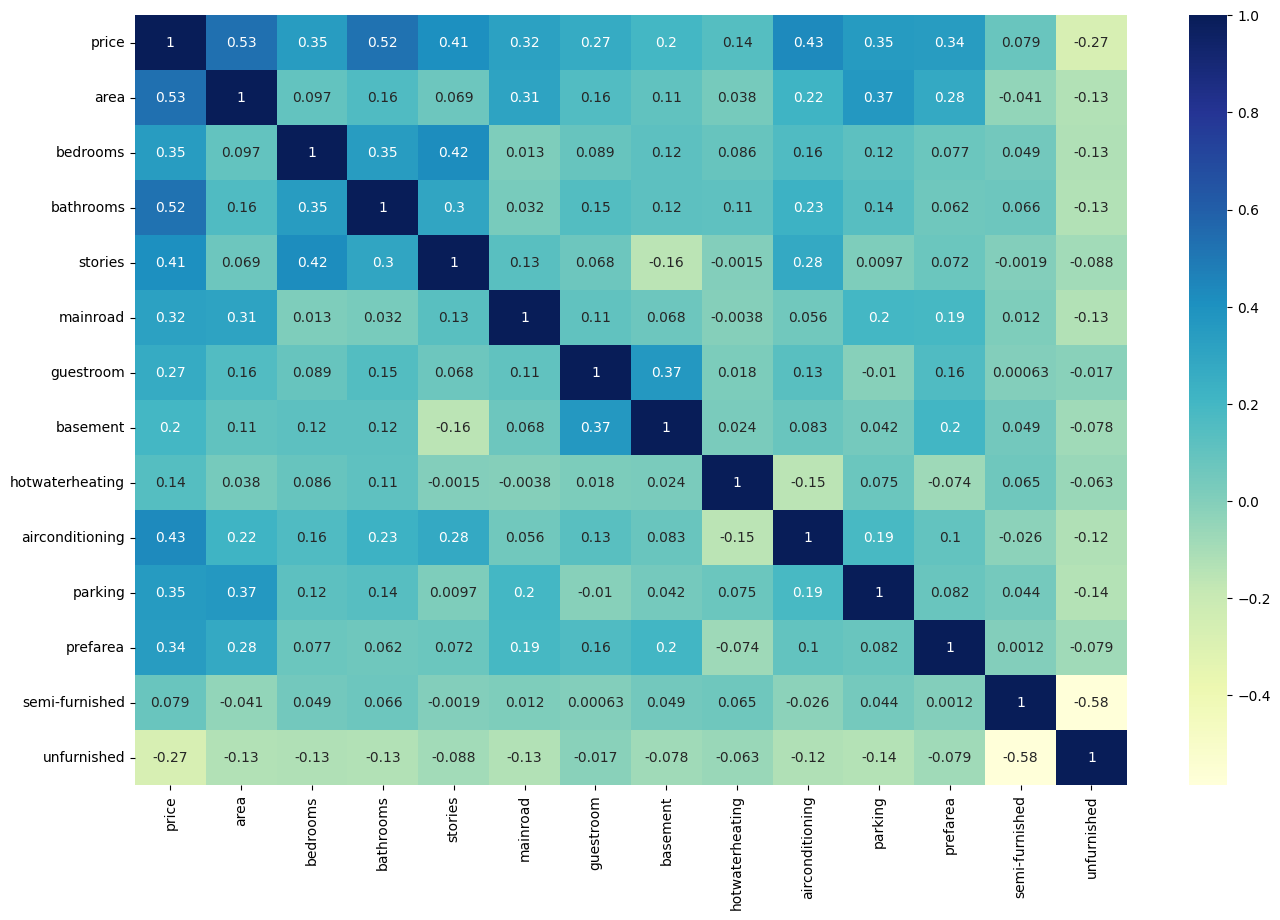

In [18]:
# heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot = True , cmap="YlGnBu")
plt.show()


# 5. Building the Model - I

Now that everything is in place, let's build the model. You will follow a bottom-up approach for this, i.e., you will start by building the model with just one variable. Hence, the choice of this variable becomes very crucial. Let’s see which variable turns out to be ‘The Chosen One’.

In [19]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


#### Dividing into X and Y sets for the model building

In [55]:
# X_train , y_train
y_train = df_train.pop('price')
X_train = df_train
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [56]:
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

Now , let's take a look at the following
1. statistical significance of the variables
2. **VIF** to understand if the variables are correlated with other variables.


Lets use statsmodel library to build the library

In [22]:
# Building a model with one variable only(area)

# add a constant
X_train_sm = sm.add_constant(X_train['area'])

# create first model
lr = sm.OLS(y_train , X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params






const    0.126894
area     0.462192
dtype: float64

In [23]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           3.15e-29
Time:                        13:39:54   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observation :
1. R^2= 0.283 , i.e 28% of the variance in the data is explained by the model with just area variable.

2. Significance of P-value , it is 0 for both the coefficients (b0,b1) , that the result is statistically significant.

In [24]:
# add another variable and build the model
X_train_sm = sm.add_constant(X_train[['area','bathrooms']])

# model
lr = sm.OLS(y_train ,X_train_sm)

# fit
lr_model = lr.fit()

# model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           2.51e-54
Time:                        13:39:54   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations:
1. R^2 increased to 48% , bathroom and area can describe almost 48% of the price.
2. Adjusted R^2 also increased to 48% , which is good
3. p-value of the coefficients are 0 which is also good , statistically significant.

In [25]:
# add 3 variables : area , bedrooms , bathrooms
X_train_sm = sm.add_constant(X_train[['area','bathrooms', 'bedrooms']])

# model
lr = sm.OLS(y_train ,X_train_sm)

# fit
lr_model = lr.fit()

# model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           3.12e-57
Time:                        13:39:55   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations:

1. R^2 increased slightly to 50% , adding bedrooms doesnt increase much , but it still good.
2. p-value of constant increase to 0.022 i.e 2% , since it is under 5% , it is still statistically significant.

Even though **‘area’** is the most correlated variable, it could explain only 28% of the variance. After that, we added '**bathroom**' as it had the second highest correlation with the target variable. Then the model was able to explain 50% of the variance.

Let's add more variables until the R^2 wont increase much and decide which variables to keep. But if we have too many variables and too much of data then that becomes expensive.

Adding two more variables has improved the model. From an adjusted R-squared value of 28%, it has moved to 50%. In the next segment, you will proceed with improving the model further.

# 6. Building the Model - II

The bottom-up approach was just to give you an idea of how the parameters change when the number of variables is increased. More generally, you first build a model using all  and then try to improve the model by dropping some of them.



Let’s now build a model with all the available variables.

In [26]:
df_housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [27]:
# build a model with all the variables
X_train_sm = sm.add_constant(X_train)

# create the model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           8.83e-83
Time:                        13:39:55   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations :

1. p-value for semi-furnished is 0.938 i.e 93% . it is very high . (Generally p-value < 0.05 is considered to be low and good , > 0.05 is considered to be high and is bad). Based on the p-values we can arrive at whether to drop the variables or not.

2. R^2 is only 68% considering all the variables.

Let's also compute VIF(variance influence factor) to check for multicollinearity.

#### VIF

Variance inflation factor gives a basic quantitaive idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

The formula is as follows:

  - VIFi = 1 / (1-Ri^2)

What does VIF of 5 mean?

5 = 1 / (1-R^2)

5-5*R^2 = 1 --> 5 * R^2 = 4 --> R^2 = 4/5 = 0.8

Which means that 80% of the variance is explained by all the other variables if VIF=5


In [28]:
# VIF
# create a dataframe that will contain the names of all the feature variables and their respective

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif.head()



,Features
0,area
1,bedrooms
2,bathrooms
3,stories
4,mainroad


In [29]:
X_train.values[:3]
X_train.shape

(381, 13)

In [30]:
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


Let's two main parameters to judge the insignificant variables, **the p-values and the VIFs**.

Now we have 2 variables with
1. 1 being high p-value(semifurnished) and
2. the other (bedrooms) with high VIF

**Note**: Usually a VIF of >5 is considered to be high. < 5 is good. Sometimes < 2 is considered good.

**Important**: What should we do now ?
Lets look at cases ,

1. case-1 : high-VIF , high p-value  -> drop those variables
2. case-2: low-VIF , low p-value  -> keep the variables
3. case-3:

    a. low VIF and high p-value   (or) remove these first

    b. high VIF and low p-value  -> remove these after the ones above.

for case-3 , we can do as follows , try to remove semi-furnished variable since it has low p-value and compute VIF again , the VIF values will change.



In [31]:
X = X_train.drop('semi-furnished',axis=1)

# create a model without semi-furnished
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train ,X_train_sm)

# fit
lr_model = lr.fit()

# model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.07e-83
Time:                        13:39:55   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations**

1. After dropping semifurnished , p-value of bedrooms seems to be high (20 % )

Let's take a look at VIF as well for the X

In [32]:
# VIF
# create a dataframe that will contain the names of all the feature variables and their respective

vif = pd.DataFrame()
vif['Features'] = X.columns


vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


Observations:

1. For bedrooms both p-value and VIF are high , we can remove the bedrooms variable

In [33]:
# create model by dropping bedrooms as well

X = X.drop('bedrooms', axis=1)

X_train_sm = sm.add_constant(X)

# model
lr = sm.OLS(y_train , X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           2.73e-84
Time:                        13:39:55   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# VIF
# create a dataframe that will contain the names of all the feature variables and their respective

vif = pd.DataFrame()
vif['Features'] = X.columns


vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


**Observations**

1. None of the p-values is not greater than 5% and none of the VIF > 5.


Now we can may be consider it as our final model

**QUIZ: Elimination based on VIF**



1) Suppose the VIFs obtained for five different variables are as follows:

X1	7.12

X2	5.53

X3	5.01

X4	3.45

X5	2.68






Assuming that you’re dropping variables only on the basis of VIF and a VIF > 5 is not acceptable, which of these variables will you definitely drop?

CHOICES:

● **X1**

● X2

● X1 and X2

● X1, X2, and X3


Correct. It is always advisable that you drop variables one by one. Now, this variable definitely has a high VIF and needs to be dropped. The other two variables X2 and X3 also have a VIF > 5, but it might happen that after you drop X1, their VIF values will drop. So never drop more than one variable at a time.

Now that we seem to have a fair model, in the next segment, let's perform the final steps - **analyse the residual terms and predict the price**.

# 7. Residual Analysis and Predictions

Before making the predictions, you need to be certain that the model is reliable. To that end, you need to first perform a residual analysis of the error terms and then move on to making the predictions on the test set; and finally, evaluate the model based on the predictions.

<Axes: ylabel='Density'>

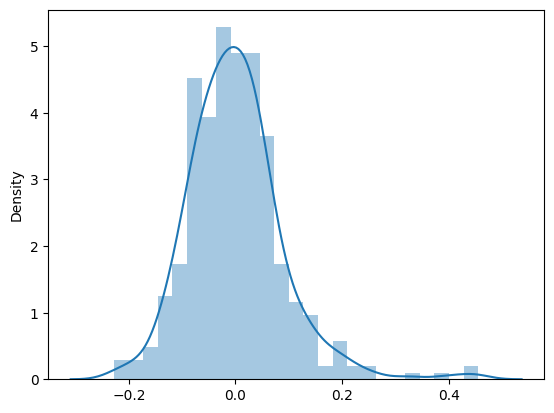

In [35]:
# predict on train set
y_train_pred = lr_model.predict(X_train_sm)

# resdiuals
res = y_train - y_train_pred
sns.distplot(res) # disb should be centered around 0 and normal

Now that the model building is done, let’s go ahead and make inferences on the model.

#### Predictions and Evaluation on the test set.

Before prediction and evaluation on test set , we have to perform all the pre-processing steps like scaling , etc.., have to be performed similarly on the test set .

Because the coefficients that the model has learnt is on the pre-processed training set.

**Note** : We never fit() on test set because we want to check how the trained model performs on unseen data, we only perform transform()

1. fit() - training data set
2. tranform() - both can be done on training set and test sets
3. fit_transform() - only on training set

In [36]:
# preprocessing steps on test set

# create list of numeric vars
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories','parking', 'price']


#
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [37]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Observations**

1. If we observe the scaled features are not between 0 and 1 for test set , because the MinMaxscaler model features that we used is based on training set. The max and min values vary for test and train set. Hence we see that difference.

In [38]:
# predicting the model on test set
y_test = df_test.pop('price')
X_test = df_test

# add a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [39]:
# keep only the features that are part of training set
X_test_sm = X_test_sm.drop(['bedrooms','semi-furnished'],axis=1)

# predict
y_test_pred = lr_model.predict(X_test_sm)

In [41]:
# Evaluate the model
r2_score(y_true= y_test , y_pred = y_test_pred)

0.6713505684480789

Observations:

1. R^2 training  = 68% , R^2 test = 67% . So we can conclude that what the model has learnt on the training set it is able to generalise well on the test set as well.

**We can see the equation of our best fitted line is as follows**

𝑝𝑟𝑖𝑐𝑒=0.236×𝑎𝑟𝑒𝑎+0.202×𝑏𝑎𝑡ℎ𝑟𝑜𝑜𝑚𝑠+0.11×𝑠𝑡𝑜𝑟𝑖𝑒𝑠+0.05×𝑚𝑎𝑖𝑛𝑟𝑜𝑎𝑑+0.04×𝑔𝑢𝑒𝑠𝑡𝑟𝑜𝑜𝑚+0.0876×ℎ𝑜𝑡𝑤𝑎𝑡𝑒𝑟ℎ𝑒𝑎𝑡𝑖𝑛𝑔+0.0682×𝑎𝑖𝑟𝑐𝑜𝑛𝑑𝑖𝑡𝑖𝑜𝑛𝑖𝑛𝑔+0.0629×𝑝𝑎𝑟𝑘𝑖𝑛𝑔+0.0637×𝑝𝑟𝑒𝑓𝑎𝑟𝑒𝑎−0.0337×𝑢𝑛𝑓𝑢𝑟𝑛𝑖𝑠ℎ𝑒𝑑+0.0428

Overall we have a decent model , but we also acknowledge that we could do better.

We have couple of options:
1. Add new features (bathrooms/bedrooms , area/stories etc.,)
2. Build a non-linear model

**QUIZ:Derived Variables**

1) List four derived variables from the housing dataset that you think can be created in order to get a better model. (Note that this is subjective and adding a derived feature does not necessarily improve the model.)

1. bathrooms/bedrooms
2. area/stories
3. parking/bedrooms
4. area/bedrooms

In the next segment, you will build a model using recursive feature elimination (RFE), which is an automated technique.

# 8. Variable Selection using RFE

Even though the housing dataset doesn’t have many variables and you can easily select the relevant features manually, it is important to learn to use certain automated techniques as well.

Let’s rebuild another model for the housing dataset using RFE.

#### Building our model with the help of RFE(Recursive feature elimination)

This time , we will be using Linear Regression function from SKLearn for its compatibility with RFE ( which is a utility from sklearn)

#### RFE

In order to use RFE, you need to use SKLearn instead of statsmodels. Let’s go ahead and create a linear model using SKLearn to perform RFE.

In [61]:
# importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
# running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train , y_train)

# rfe requires two things : 1st is model that is built on training set , 2
rfe = RFE(estimator=lm, n_features_to_select=10) # running RFE

rfe = rfe.fit(X_train,y_train)

In [63]:
list(zip(X_train.columns , rfe.support_ , rfe.ranking_ ))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

rfe_support tells if that particular feature is elected ro not

rfe_ranking ranks the feature importance

In [65]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

#### Building model using statsmodel , for the detailed statistics

In [66]:
# creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# create a model
lm = sm.OLS(y_train , X_train_rfe)

# fit the model
lm_model = lm.fit()

# model summary
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.28e-82
Time:                        16:09:43   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018      0.151      0.880      -0.033       0.038
area                0.2363      0.030      7.787      0.000       0.177       0.296
bedrooms            0.0661      0.037      1.794      0.074      -0.006       0.139
bathrooms           0.1982      0.022      8.927      0.000       0.155       0.242
stories             0.0977      0.019      5.251      0.000       0.061       0.134
mainroad            0.0556      0.014      3.848      0.000       0.027       0.084
guestroom           0.0381      0.013      2.934      0.004       0.013       0.064
hotwaterheating     0.0897      0.022      4.104      0.000       0.047       0.133
airconditioning     0.0711      0.011      6.235      0.000       0.049       0.093
parking             0.0637      0.018      3.488      0.001       0.028       0.100
prefarea            0.0643      0.012      5.445      0.000       0.041       0.088
==============================================================================
Omnibus:                       86.105   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.069
Skew:                           0.992   Prob(JB):                     7.60e-63
Kurtosis:                       6.753   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations**

1. R^2 = 66%(0.66)
2. Except for bedrooms every other variables have significant p-value i.e < 5%. So, lets drop the variable bedrooms and try the model again?

In [67]:
# drop bedrooms from training
X_train_new = X_train_rfe.drop(['bedrooms'],axis=1)

# rebuild the model without bedrooms

# add a constant variable
X_train_lm = sm.add_constant(X_train_new)

# run the model
lm = sm.OLS(y_train , X_train_new).fit()

# model summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           6.67e-83
Time:                        16:16:21   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013      1.794      0.074      -0.002       0.051
area                0.2367      0.030      7.779      0.000       0.177       0.297
bathrooms           0.2070      0.022      9.537      0.000       0.164       0.250
stories             0.1096      0.017      6.280      0.000       0.075       0.144
mainroad            0.0536      0.014      3.710      0.000       0.025       0.082
guestroom           0.0390      0.013      2.991      0.003       0.013       0.065
hotwaterheating     0.0921      0.022      4.213      0.000       0.049       0.135
airconditioning     0.0710      0.011      6.212      0.000       0.049       0.094
parking             0.0669      0.018      3.665      0.000       0.031       0.103
prefarea            0.0653      0.012      5.513      0.000       0.042       0.089
==============================================================================
Omnibus:                       91.542   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.402
Skew:                           1.044   Prob(JB):                     3.25e-69
Kurtosis:                       6.938   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations**

1. Dropping the bedroom is a good idea since R^2 didnt drop much

In [68]:
X_train_new.columns

Index(['const', 'area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [69]:
X_train_new = X_train_new.drop(['const'],axis=1)

In [70]:
# calcualte the VIFs for the new model
vif = pd.DataFrame()

X = X_train_new

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,area,4.52
3,mainroad,4.26
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
4,guestroom,1.30
5,hotwaterheating,1.12


Now that the features have been selected and the model is built, let's do the residual analysis and make the final predictions.

#### Residual Analysis of the train data

So now to check if the error terms are also normally distributed ( which is infact , one of the major assumptions of linear regression) , let us plot the histogram of the error terms and see what it looks like

In [71]:
y_train_price = lm.predict(X_train_lm)

In [72]:
%matplotlib inline

Text(0.5, 0, 'Errors')

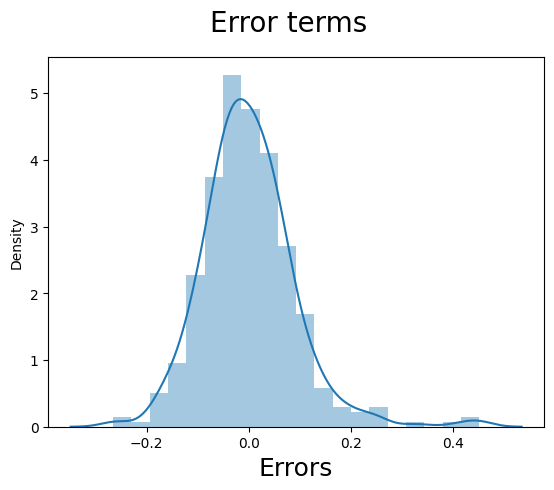

In [73]:
# plot the histogram of the error terms
fig = plt.figure()
sns.distplot(y_train - y_train_price, bins= 20)
fig.suptitle('Error terms', fontsize = 20)  # plot heading
plt.xlabel('Errors', fontsize=18)  # x-label

#### Making Predictions

**Applying the scaling on the test sets**

In [74]:
num_vars = ['area','bedrooms','bathrooms','stories','parking','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])


**Dividing into X_test and y_test**

In [75]:
y_test = df_test.pop('price')
X_test = df_test

# Now let's use our model to make predictions

# create X_test_new df by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

#### Model Evaluation

Text(0, 0.5, 'y_pred')

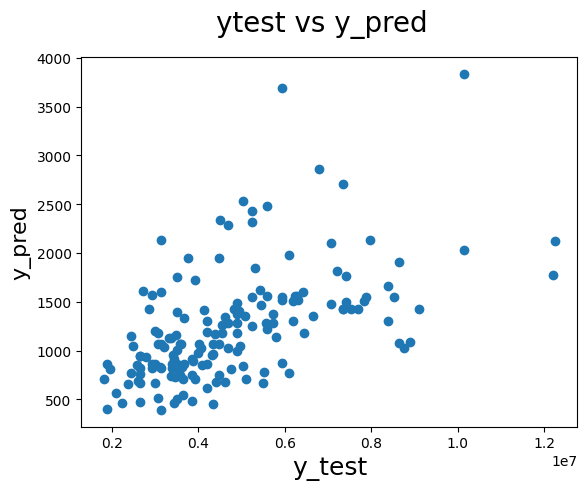

In [76]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('ytest vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred',fontsize=16)


**QUIZ: Elimination based on RFE**

1) You performed RFE on a dataset to select 10 out of a total of 13 features. Following is the output for the 13 features you get on performing the RFE:

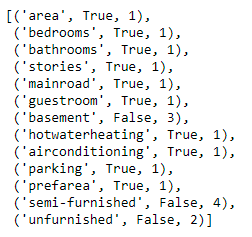

But now, you decided that you want 11 features in the model. Clearly, you need not run the RFE code again; you can simply use the above output. So based on the above output, which of the features will you eliminate?



CHOICES:
● unfurnished and basement

● unfurnished and semi-furnished

● basement and semi-furnished

● basement and semi-furnished

Explanation :

The numbers beside the variables indicate the importance of that variable. As you can see, 'unfurnished' has the number 2, and 'basement' and 'semifurnished' are 3 and 4 respectively. So if you want to retain 11 features, you will eliminate 'basement' and 'semifurnished'.


# 9. Summary

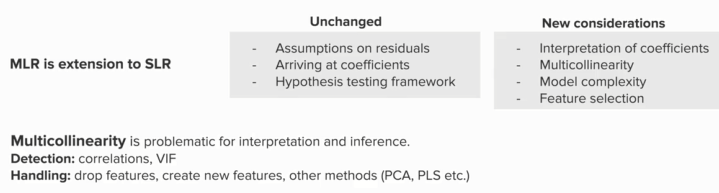

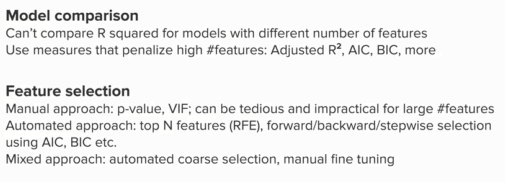

# 10. Interview Practice Questions

**QUIZ::Residuals and Linear Regression**

1) In regression analysis, which of the statements is true?


CHOICES:

● **The mean of residuals is always equal to zero**.


● The mean of residuals is less than zero at all times.


● The sum of residuals is more than zero at all times.


● **The sum of residuals is always equal to zero**.


When a model gives you a “best fit” line, by design it is made such that the mean of all residuals is always zero.

When a model gives you a “best fit” line, by design it is made such that the sum of all residuals is always zero.





2) Which of the following is incorrect about linear regression?


CHOICES:

● Linear regression is very sensitive to data anomalies.


● Linear regression performs poorly when there are non-linear relationships.

● Linear regression guarantees interpolation but not extrapolation.


● **Linear regression assumes that the data points are not independent (i.e. One observation might be affected by another)**.


Linear regression assumes that the data points are independent.


1) State True or False:

Overfitting leads to a very high value of R-squared, which is misleading since the model is not actually a good predictor.

CHOICES:

● **True**

● False


Overfitting causes the model to almost memorize the data. This reduces the distance between predicted and actual values in the training set. However, this could make the model less accurate on new data, i.e., the model memorises the data instead of recognizing the pattern that the data is following.

2) Which of the following will help you in effectively comparing models (built on the same dataset) with different numbers of features?


CHOICES:

● R-squared

● **R-squared-adjusted**

This will take number of features into account and give you a fair idea of how many features the model should have

1) Assume that a model has zero training error. i.e. it has completely memorised the training data(a case of overfitting). Which of the following statements is definitely true in this case:


CHOICES:

● The prediction error on the test set cannot be zero

● The prediction error on the test set will always be very high

● **None of the above**

Due to overfitting, it is highly likely that you will have high prediction error on the test set. This would be the case more often than not. But there can be exceptions hence such a statement cannot be made for sure



1) Consider the following dataset:

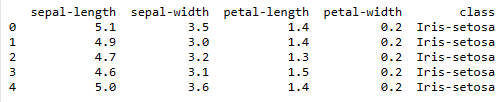

Consider that the categorical column/variable has missing values, which metric would you impute the missing values with?

CHOICES:
● Mean

● Median

● Mode

**Mode**
Categorical values are generally imputed with the mode as it represents the value that is the most common for the given column.

# 11. Graded Questions

1) Suppose you're trying to predict the gross collection of a movie based on the following five factors: 'Budget', 'Average Critic Score', 'Facebook Likes', 'Number of Tweets', and 'Number of Screens'.

You obtained the following p-values for the five variables after fitting a regression line. Assuming you're only using p-value as a criteria to drop the variables and a p-value > 0.05 is not acceptable, which of these variables do you think is not significant in the prediction of gross collections and should be definitely dropped? Only one option is correct.

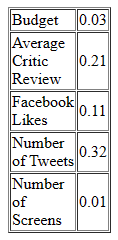

CHOICES:

● **Number of Tweets**

● Number of Tweets, Average Critic Review

● Number of Tweets, Facebook Likes

● Number of Screens

Yes! As you can see, the p-value of 'Number of Tweets' is very high and thus, this variable is insignificant. Now, there are other variables in the list which also have a high p-value but we don't drop these simultaneously as it might happen that dropping 'Number of Tweets' might reduce the p-value of the other variables and make them significant

1) Which of the following is/are true regarding the scaling of variables? More than one option(s) may be correct.


CHOICES:

● Scaling should be done before the test-train split.

● **Scaling should be done after the test-train split**.

● Standardised scaling will affect the values of dummy variables but MinMax scaling will not.

● MinMax scaling will affect the values of dummy variables but standardized scaling will not.

Correct! Scaling should always be done after the test-train split since you don't want the test dataset to learn anything from the train data. So if you're performing the test-train split earlier, the test data will then have information regarding the data like the minimum and maximum values, etc.

MinMax scaling scales in such a way that all the values lie between 0 and 1 using the formula:

x - min(x)max(x)−min(x)

So if you have dummy variables, which can only take the values 0 and 1, you can notice that for the case of zero, the variable remains zero and for the case of 1, the variable remains 1.

On the other hand, the standard scaler scales in such a way that the mean of the dataset becomes zero and standard deviation becomes one. So this will clearly distort the values of the dummy variables since some of the variables will become negative.

1) Consider you are performing multiple linear regression where X1 and X2 are independent variables and Y is the dependent variable. What can you say about the coefficient of X1 and value of y in the regression equation?

y=β0+β1∗X1+β2∗X2

CHOICES:

● The predicted value of Y increases by β1 for a unit increase in X1, irrespective of a change in X2.

● **The predicted value of Y increases by β1 for a unit increase in X1, given X2 does not change**

● The predicted value of Y is β1 when X1=1.

● The predicted value of Y is X2 when X1=0.

1) In the R-squared Adjusted metric, R-squared is “adjusted” or modified according to (More than one option may be correct):


CHOICES:

● **Number of predictors**

In the R-squared Adjusted formula, you can see the term ‘k’ in the denominator, where ‘k’ refers to the number of predictors or features in the model

● **Sample size**

In the R-squared Adjusted formula, you can see the term ‘n’ in both numerator and denominator, where ‘n’ refers to sample size

● Number of missing values in data

● All of the above